In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


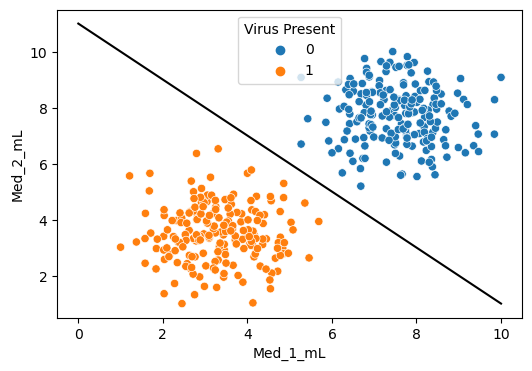

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

m=-1
b=11
x=np.linspace(0,10,100)
y=m*x+b
plt.plot(x,y,'black')
plt.show()

In [10]:
from sklearn.svm import SVC

In [12]:
y=df['Virus Present']
x=df.drop('Virus Present',axis=1)

In [13]:
model=SVC(kernel='linear',C=1000)  
# if you set the c very small then it means allowing a lot of point within the margin

In [14]:
model.fit(x,y)

SVC(C=1000, kernel='linear')

In [15]:
from svm_margin_plot import plot_svm_boundary

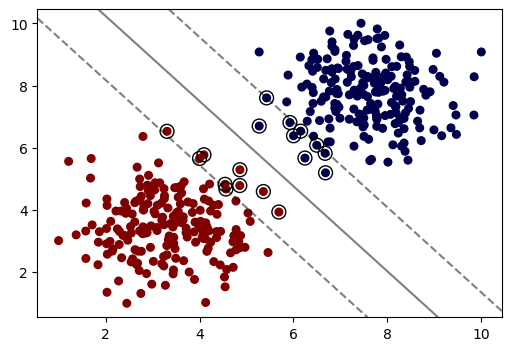

In [24]:
plt.figure(figsize=(6,4))
plot_svm_boundary(model,x,y)
plt.show()

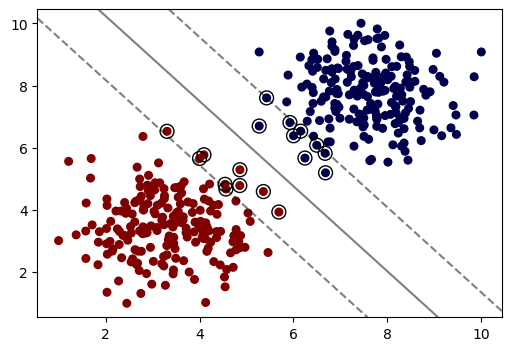

In [26]:
model=SVC(kernel='linear',C=0.05)
model.fit(x,y)
plt.figure(figsize=(6,4))
plot_svm_boundary(model,x,y)
plt.show()

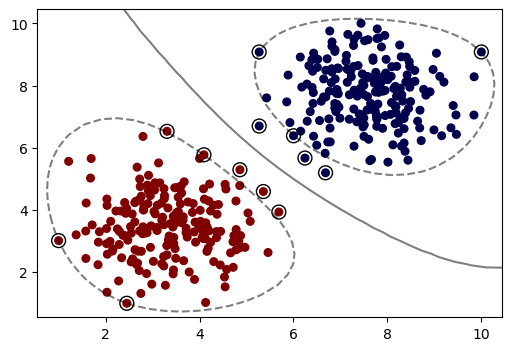

In [27]:
model=SVC(kernel='rbf',C=1,gama='scale') # 'rbf' is performing well in kernel option
model.fit(x,y)
plt.figure(figsize=(6,4))
plot_svm_boundary(model,x,y)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
svm=SVC()
param_grid={'C':[0.01,0.1,0.5,1,1.5],'kernel':['linear','rbf']}

In [30]:
grid=GridSearchCV(svm,param_grid)

In [33]:
grid.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 1.5],
                         'kernel': ['linear', 'rbf']})

In [34]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

## use svm to predict continuous label

In [37]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [38]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [40]:
x = df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [45]:
from sklearn.svm import SVR,LinearSVR

In [46]:
param_grid={'C':[0.01,0.1,0,0.5,1],
            'kernel':['linear','rbf','poly'],
            'gamma':['scale','auto'],
            'degree':[2,3,4],
            'epsilon':[0,0.01,0.1,0.5,1,1.5,2,2.5]
           }

In [47]:
svr=SVR()
gridmodel=GridSearchCV(svr,param_grid)
gridmodel.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 1.5, 2, 2.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [48]:
gridmodel.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
grid_preds=gridmodel.predict(scaled_X_test)

In [51]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [52]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347